<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 143.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 169.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 157.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 163.2 MB/s eta 0:00:00


#### Step 1: Load the dataset


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




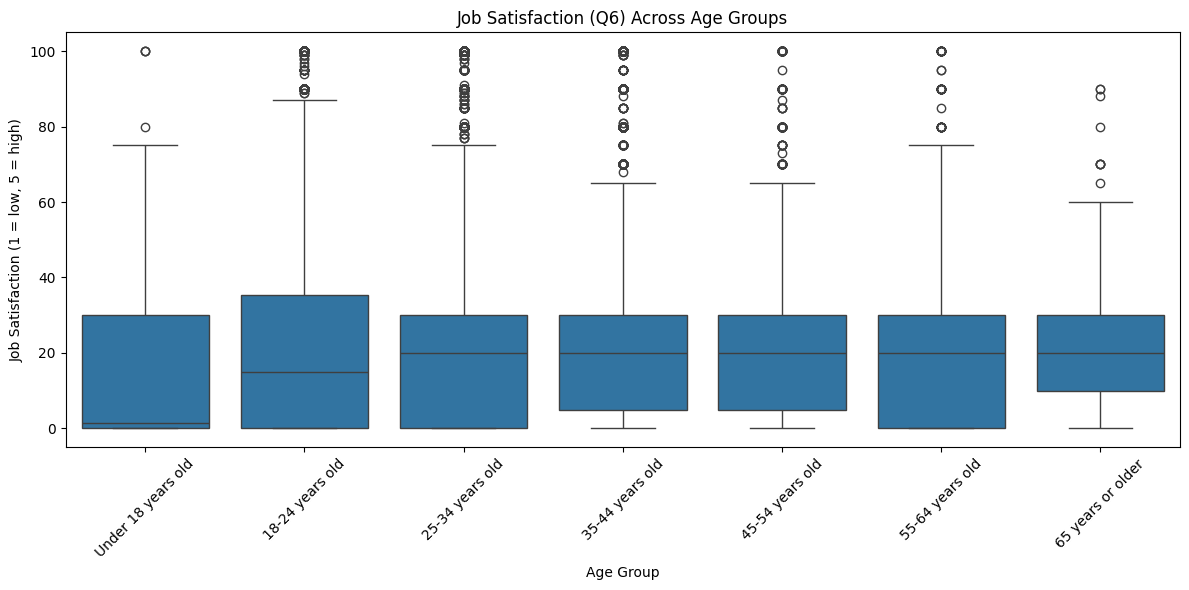

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a consistent order for age groups
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

# Filter the dataset for valid entries
df_plot = df[df['Age'].isin(age_order) & df['JobSatPoints_6'].notna()]

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_plot, x='Age', y='JobSatPoints_6', order=age_order)
plt.title('Job Satisfaction (Q6) Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Job Satisfaction (1 = low, 5 = high)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


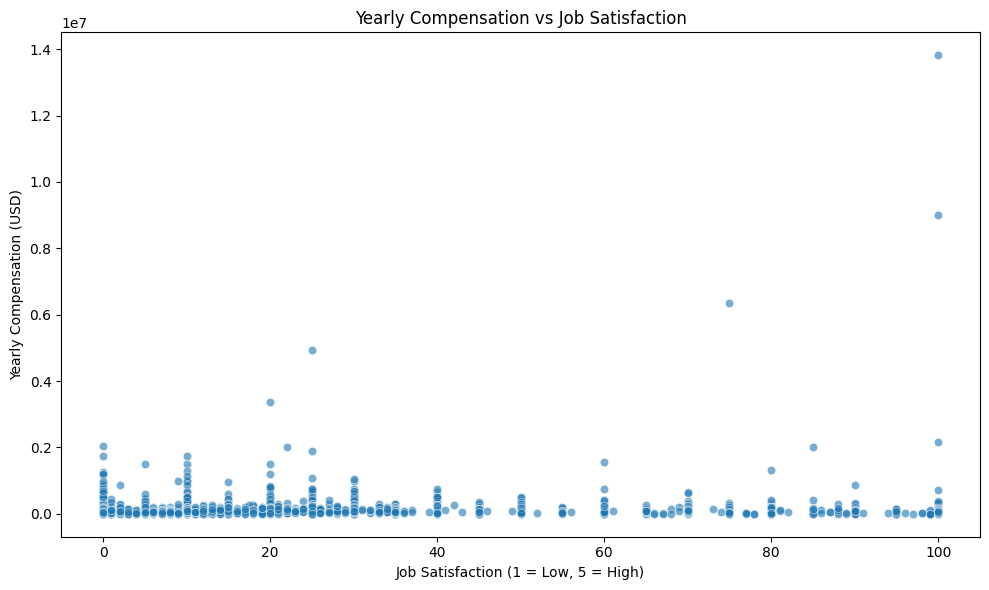

In [6]:
# Filter rows with non-null values in both columns
df_scatter = df[['ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scatter, x='JobSatPoints_6', y='ConvertedCompYearly', alpha=0.6)

plt.title('Yearly Compensation vs Job Satisfaction')
plt.xlabel('Job Satisfaction (1 = Low, 5 = High)')
plt.ylabel('Yearly Compensation (USD)')
plt.tight_layout()
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


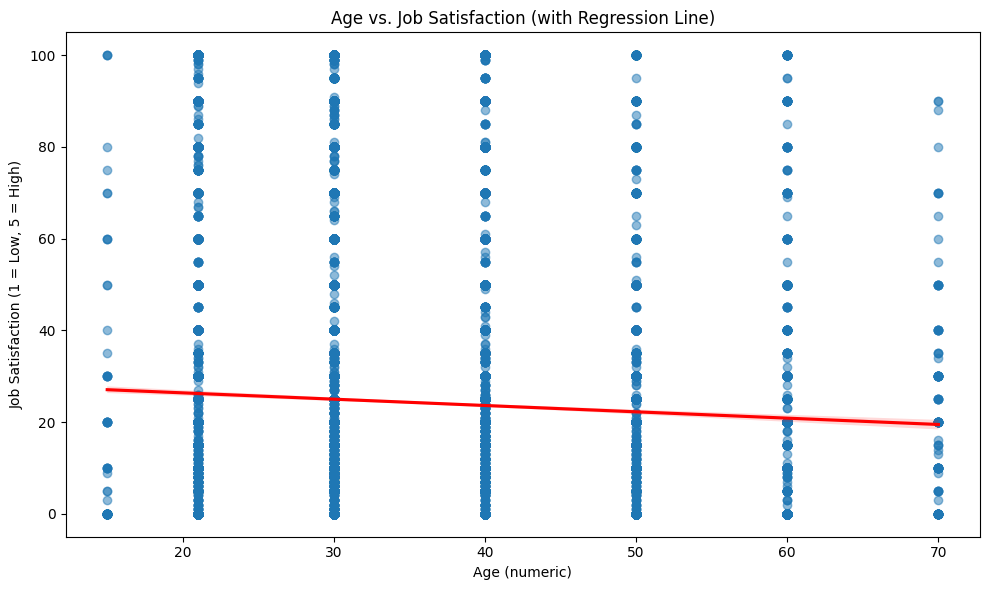

In [7]:
# First, map Age categories to numeric values
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Create a new column for numeric age
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Drop rows with missing values
df_age = df[['AgeNumeric', 'JobSatPoints_6']].dropna()

# Plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df_age, x='AgeNumeric', y='JobSatPoints_6', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

plt.title('Age vs. Job Satisfaction (with Regression Line)')
plt.xlabel('Age (numeric)')
plt.ylabel('Job Satisfaction (1 = Low, 5 = High)')
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


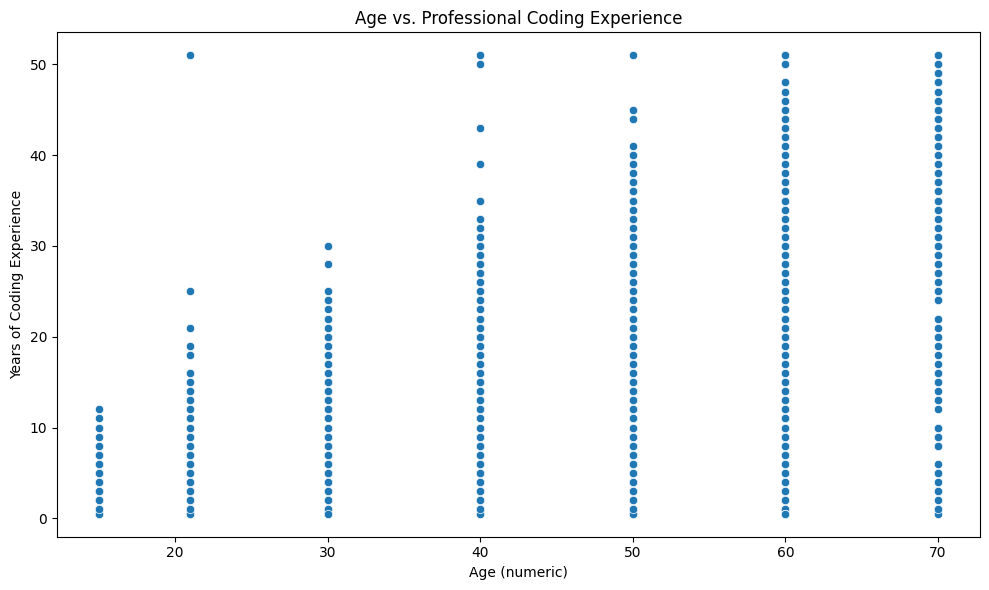

In [8]:
# Mapping age categories to numeric values
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Apply mapping
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Create cleaned dataframe for plotting
df_cleaned = df[['AgeNumeric', 'YearsCodePro']].dropna()

# Ensure YearsCodePro is numeric (convert strings like 'Less than 1 year')
df_cleaned['YearsCodePro'] = pd.to_numeric(
    df_cleaned['YearsCodePro'].replace('Less than 1 year', 0.5).replace('More than 50 years', 51),
    errors='coerce'
).dropna()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='AgeNumeric', y='YearsCodePro')
plt.title('Age vs. Professional Coding Experience')
plt.xlabel('Age (numeric)')
plt.ylabel('Years of Coding Experience')
plt.tight_layout()
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


/tmp/ipykernel_2001/844543993.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


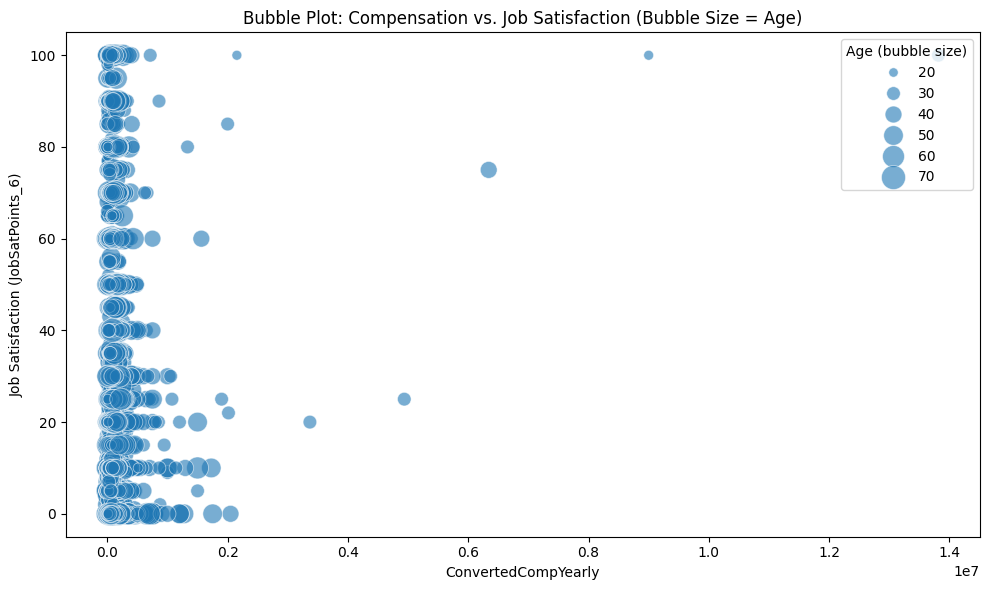

In [9]:

# Step 1: Map Age to numeric values
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['AgeNumeric'] = df['Age'].map(age_mapping)

# Step 2: Clean data and drop missing values
bubble_data = df[['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNumeric']].dropna()

# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=bubble_data,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    size='AgeNumeric',
    sizes=(20, 300),  # Control min and max bubble size
    alpha=0.6,
    palette='viridis'
)

plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.legend(title='Age (bubble size)', loc='upper right')
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


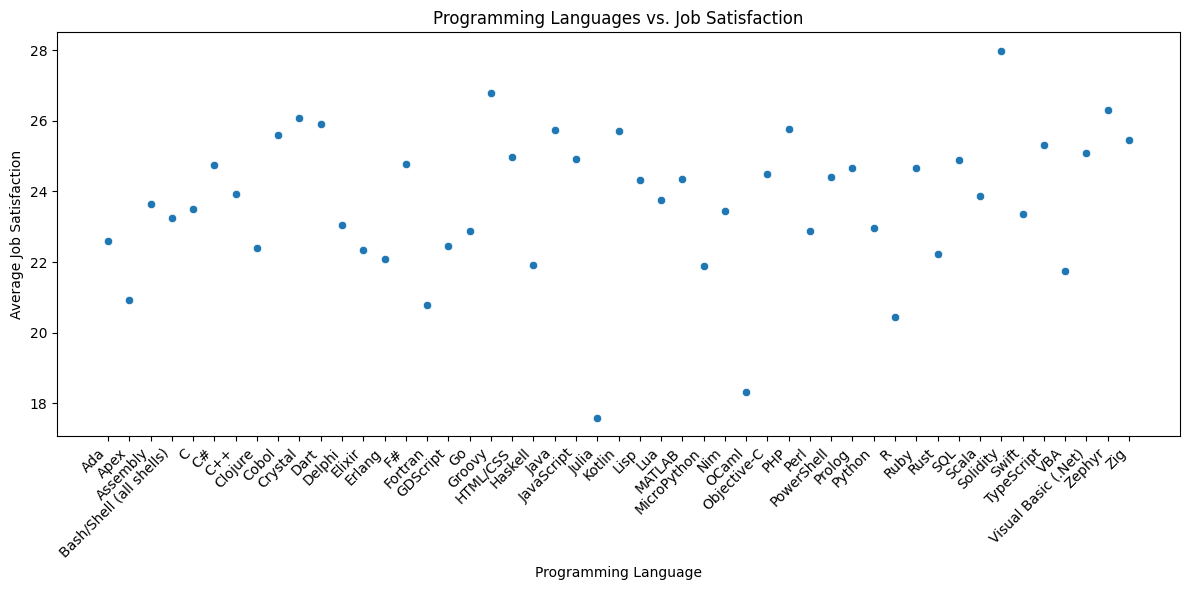

In [5]:
# Step 1: Drop rows with missing values in required columns
lang_sat_df = df[['LanguageHaveWorkedWith', 'JobSatPoints_6']].dropna()

# Step 2: Create a list of rows where each language gets its own row
rows = []
for _, row in lang_sat_df.iterrows():
    languages = [lang.strip() for lang in row['LanguageHaveWorkedWith'].split(';')]
    for lang in languages:
        rows.append({'Language': lang, 'JobSatPoints_6': row['JobSatPoints_6']})

# Step 3: Create a new DataFrame from the exploded rows
lang_df = pd.DataFrame(rows)

# Step 4: Group by language and calculate average satisfaction
lang_avg = lang_df.groupby('Language')['JobSatPoints_6'].mean().reset_index()

# Step 5: Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=lang_avg, x='Language', y='JobSatPoints_6')
plt.xticks(rotation=45, ha='right')
plt.title('Programming Languages vs. Job Satisfaction')
plt.xlabel('Programming Language')
plt.ylabel('Average Job Satisfaction')
plt.tight_layout()
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_300/2960314120.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


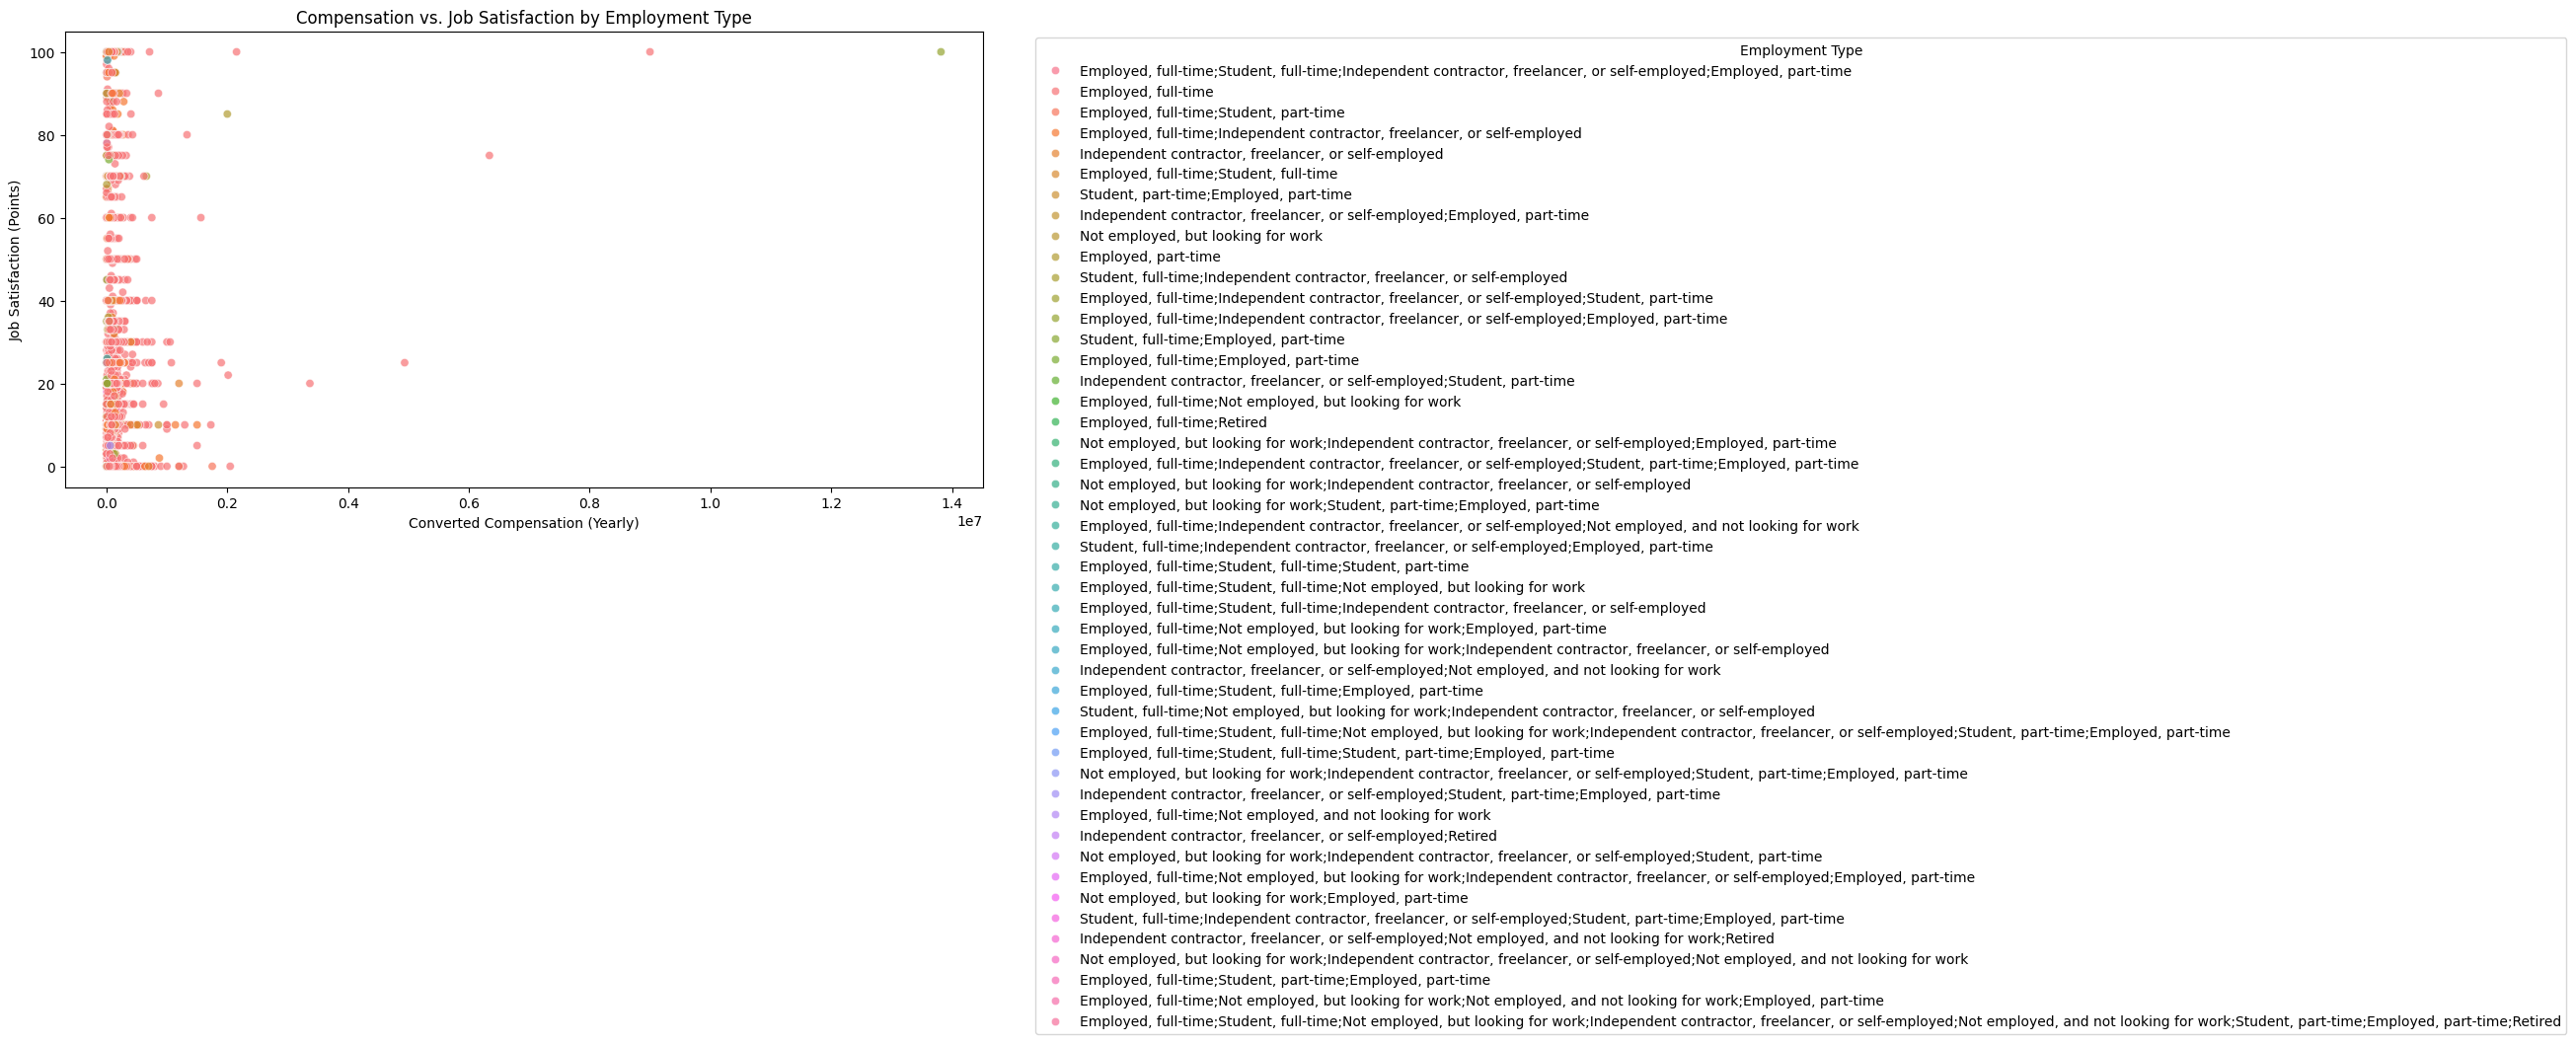

In [6]:
# Drop rows with missing values in the required columns
plot_df = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']].dropna()

# Create the scatter plot with hue based on Employment type
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=plot_df,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='Employment',
    alpha=0.7
)

plt.title('Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Converted Compensation (Yearly)')
plt.ylabel('Job Satisfaction (Points)')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [ ]:
## Write your code here

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
